In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import openexplorer as oe
import numpy as np
from simtk import unit
from simtk.openmm import app
import matplotlib.pyplot as plt

# MonteCarlo

In [3]:
modeller = msm.convert('alanine_dipeptide.pdb', to_form='openmm.Modeller')

topology = modeller.topology
positions = modeller.positions

forcefield = app.ForceField('amber10.xml', 'amber10_obc.xml')
system = forcefield.createSystem(topology, constraints=app.HBonds, nonbondedMethod=app.NoCutoff)

explorer = oe.Explorer(topology, system, platform='CUDA')

In [4]:
explorer.set_coordinates(positions)

In [5]:
explorer.quench()

In [6]:
movement = oe.movements.RandomDihedralMaxShifts(stepsize=5*unit.degrees)

In [12]:
reporter = oe.reporters.OpenExplorerReporter(1, step=True, coordinates=True, boxVectors=False,
                                             potentialEnergy=True)

In [14]:
exploration = oe.exploration_campaign.MonteCarlo(explorer, movement, temperature=300.0*unit.kelvin,
                                                 reporter=reporter)

In [15]:
exploration.run(1000)

In [16]:
exploration.n_tries

1000

In [17]:
exploration.n_acceptances

867

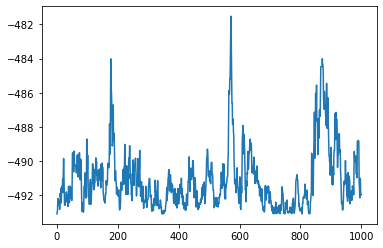

In [18]:
plt.plot(exploration.reporter.step, exploration.reporter.potential_energy._value)
plt.show()

In [20]:
msm.view(exploration.reporter)

NotImplementedError: This item's form has not been implemented yet

In [21]:
msm.get_form(exploration.reporter)

NotImplementedError: This item's form has not been implemented yet

In [ ]:
exploration.reset(temperature=900.0*unit.kelvin)

In [ ]:
exploration.run(10000)

In [ ]:
exploration.n_tries

In [ ]:
exploration.n_acceptances